In [91]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
df = pd.read_csv (r'./example_export.txt', sep = '\t') 
df

,Time,EMG
0,0.000,0.000000
1,0.001,0.000000
2,0.002,0.000000
3,0.003,0.000000
4,0.004,0.000000
...,...,...
56795,56.795,0.091024
56796,56.796,0.210582
56797,56.797,0.118342
56798,56.798,-0.171094


Text(0, 0.5, 'EMG (Volts)')

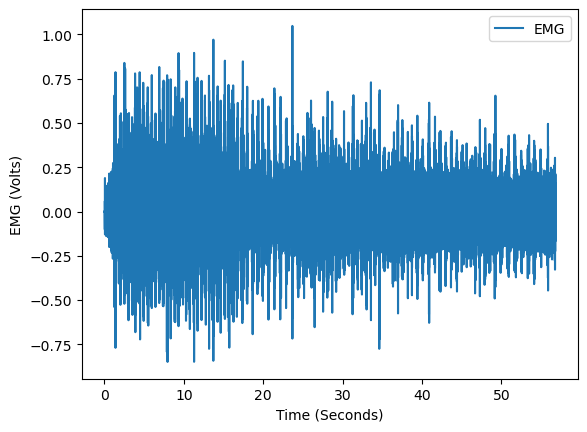

In [93]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

### Decide how you want to analyze the data... 

In [95]:
# Define the parameters 
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10  # Step size in seconds (how often you want to check the window size)


### Run the code that will perform the analysis and display results at bottom

In [69]:
# Initialize lists to store the calculated max values
max_values = []
time_intervals = []

# Iterate through the data in steps
for i in range(0, len(df), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)
    
    if end_idx < len(df):
        window_data = df.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values.append(max_value)
        
        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals
result_df = pd.DataFrame({'Time': time_intervals, 'MaxEMG': max_values})

# Calculate the percentage of max EMG for each 0.5 seconds interval
result_df['MaxEMG_percent'] = (result_df['MaxEMG'] / result_df['MaxEMG'].max()) * 100

# Display the result
print(result_df)

      Time    MaxEMG  MaxEMG_percent
0   1.4995  0.839139       93.689667
1  11.4995  0.895658      100.000000
2  21.4995  0.695603       77.663907
3  31.4995  0.656789       73.330334
4  41.4995  0.614526       68.611680
5  51.4995  0.434579       48.520641


### Set a threshold of Max_EMG_percent for fatigability determination (what % of max is considered fatigued)

In [97]:
threshold = 70 

### Calculate when 'MaxEMG_percent' reaches approximately threshold

In [99]:
reached_threshold = result_df[result_df['MaxEMG_percent'] <= threshold]
time_at_threshold = reached_threshold['Time'].iloc[0]
print(f"Time at ~{threshold} % of max: {time_at_threshold} seconds")

Time at ~70 % of max: 41.4995 seconds


### Graph the EMG data including when it reaches fatigability threshold

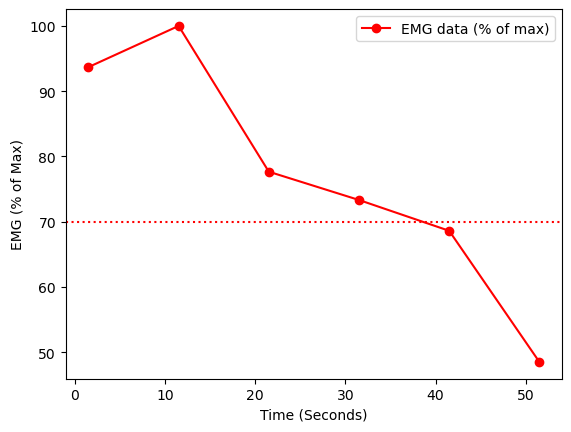

In [108]:
fig, ax = plt.subplots()
result_df.plot.line(ax = ax, y = 'MaxEMG_percent', x = 'Time', color = 'r', marker = 'o')
L=plt.legend()
L.get_texts()[0].set_text('EMG data (% of max)')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')